#***Lab Mid Project - Exploratory Data Analysis and Classification Models***




---



#*Group Members:*

##***1. Abdul Saboor (FA22-BAI-024)***
##***2. Talha Asif (FA22-BAI-040)***

---









#Dataset: **Netlfix Data**

---








#Submitted to: **Sir Hafiz Syed Ahmed Qasim**

---



#***1. Dataset Selection - Netflix Data***

The chosen Netflix dataset, ideal for classification tasks, encompasses both categorical and numerical features, depicting content additions from 2008 to 2021, including movies, TV shows, and original content. With a span from 1925 to 2021, the dataset is well-suited for refining skills in data cleaning and visualization using PostgreSQL and Tableau, while potentially exploring genre classification and other predictive modeling tasks.

---



#***2. Data Preprocessing:***

Data preprocessing is a crucial step in preparing datasets for analysis and modeling. It involves handling missing values, outliers, and other data quality issues, as well as encoding categorical variables appropriately. By addressing these tasks, we ensure the reliability and suitability of the data for subsequent analysis, enabling accurate and effective modeling.

##- Importing Dataset:





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go



In [2]:
df = pd.read_csv('/Users/saboor/Downloads/netflix1.csv')

df.shape

(8790, 10)

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


##- Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

##*- Data Cleaning:*
Data cleaning is a vital aspect of preprocessing, involving the identification and resolution of errors, missing values, and inconsistencies in the dataset to ensure its accuracy and reliability for analysis and modeling.

###1. Count Missing values:
This code quickly counts the number of missing values in each column of the DataFrame `df`.

In [7]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

###2. Count Duplicate Rows:
This code counts the number of duplicated rows in the DataFrame `df`.

In [8]:
df.duplicated().sum()

0

###3. Renaming Columns for Clarity and Consciseness:
This code renames specific columns in the DataFrame df to 'ID', 'Date', and 'genre' respectively, and displays the first few rows of the updated DataFrame.

In [9]:
df.rename(columns={'show_id':'ID','date_added':'Date','listed_in':'genre'},inplace=True)

df.head()

,ID,type,title,director,country,Date,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


###4. Date Formate Change:
This code converts the 'Date' column in the DataFrame `df` to datetime format using the `pd.to_datetime()` function.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])


###*5. One-Hot Encoding:*
This code takes categorical columns ('type', 'rating', and 'country') from a DataFrame called pd and converts them into numerical format. It creates new binary columns for each category, indicating their presence or absence in the original data. This process is known as one-hot encoding and is often used in machine learning to handle categorical data.

In [11]:
netflix1_encoded = pd.get_dummies(pd, columns=['type', 'rating', 'country'])


###6. Check if it is ready to analysis and modeling:


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   Date          8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [13]:
df.describe()

,Date,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466




---


#***3. Exploitory Data Analysis (EDA):***
Exploratory Data Analysis (EDA) involves examining the dataset to understand its characteristics and relationships between variables. It includes generating descriptive statistics, visualizations, and correlations to gain insights into the data. Through EDA, we uncover patterns, anomalies, and trends, which help inform subsequent analysis and modeling decisions.



**This code counts the occurrences of each unique value in the 'type' column of the DataFrame `df` and stores the result in the variable `showtype`.**

In [14]:
showtype = df['type'].value_counts().reset_index()

showtype

,type,count
0,Movie,6126
1,TV Show,2664


**This code generates a pie chart to visualize the distribution of 'Movie' and 'TV Show' categories.**

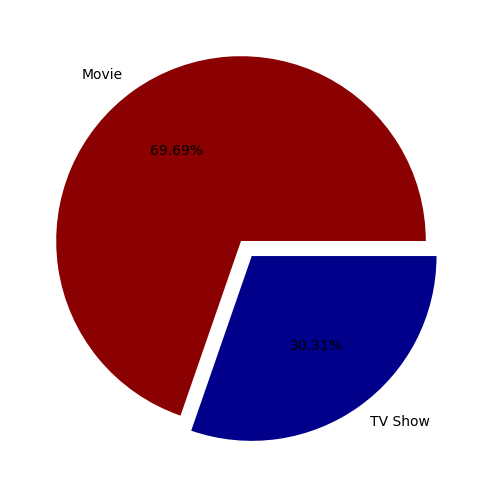

In [15]:

plt.figure(figsize=(6,6))
plt.pie(showtype['count'],labels=['Movie','TV Show'],autopct='%1.2f%%',explode=[0,0.1], colors=['darkred', 'darkblue'])
plt.show()

**This code displays the top 10 directors with the highest counts in the 'director' column of the DataFrame `df`.**

In [16]:
directors = df['director'].value_counts()
directors.head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

**This code calculates the total count of directors excluding the first one with the highest count and prints the result.**

In [17]:
given_directors = directors.sum() - directors[0]
print(f'given directors = {given_directors}')

given directors = 6202


**This code groups the DataFrame `df` by 'director' and 'type', counts the occurrences of each director in each category, and displays the top 20 results.**

In [18]:
directors = df.groupby(['director', 'type'])['director'].value_counts().reset_index().head(20)
directors

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
5,Aamir Bashir,Movie,1
6,Aamir Khan,Movie,1
7,Aanand Rai,Movie,1
8,Aaron Burns,Movie,1
9,"Aaron Hancox, Michael McNamara",Movie,1


**This code generates a bar plot to visualize the top 20 directors and their counts using Matplotlib.**

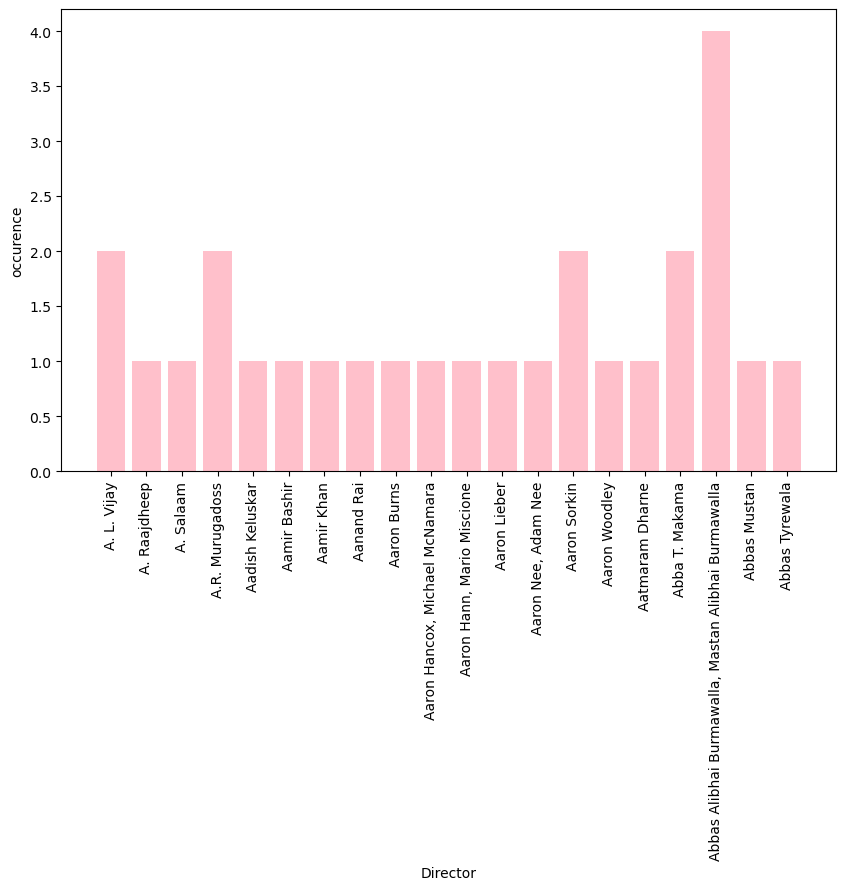

In [46]:
plt.figure(figsize=(10,6))
plt.bar(directors['director'],directors['count'],color='pink')
plt.xticks(rotation=90)
plt.xlabel("Director")
plt.ylabel("occurence")
plt.show()

**This code counts the occurrences of each country in the 'country' column of the DataFrame `df`, sorts them in descending order, and displays the top 60 countries.**

In [20]:
country = df['country'].value_counts().reset_index().sort_values(by='count',ascending = False).head(60)
country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


**This code creates a bar plot to visualize the top 10 countries and the number of movies associated with each using Seaborn.**

Text(0, 0.5, 'No of Movies')

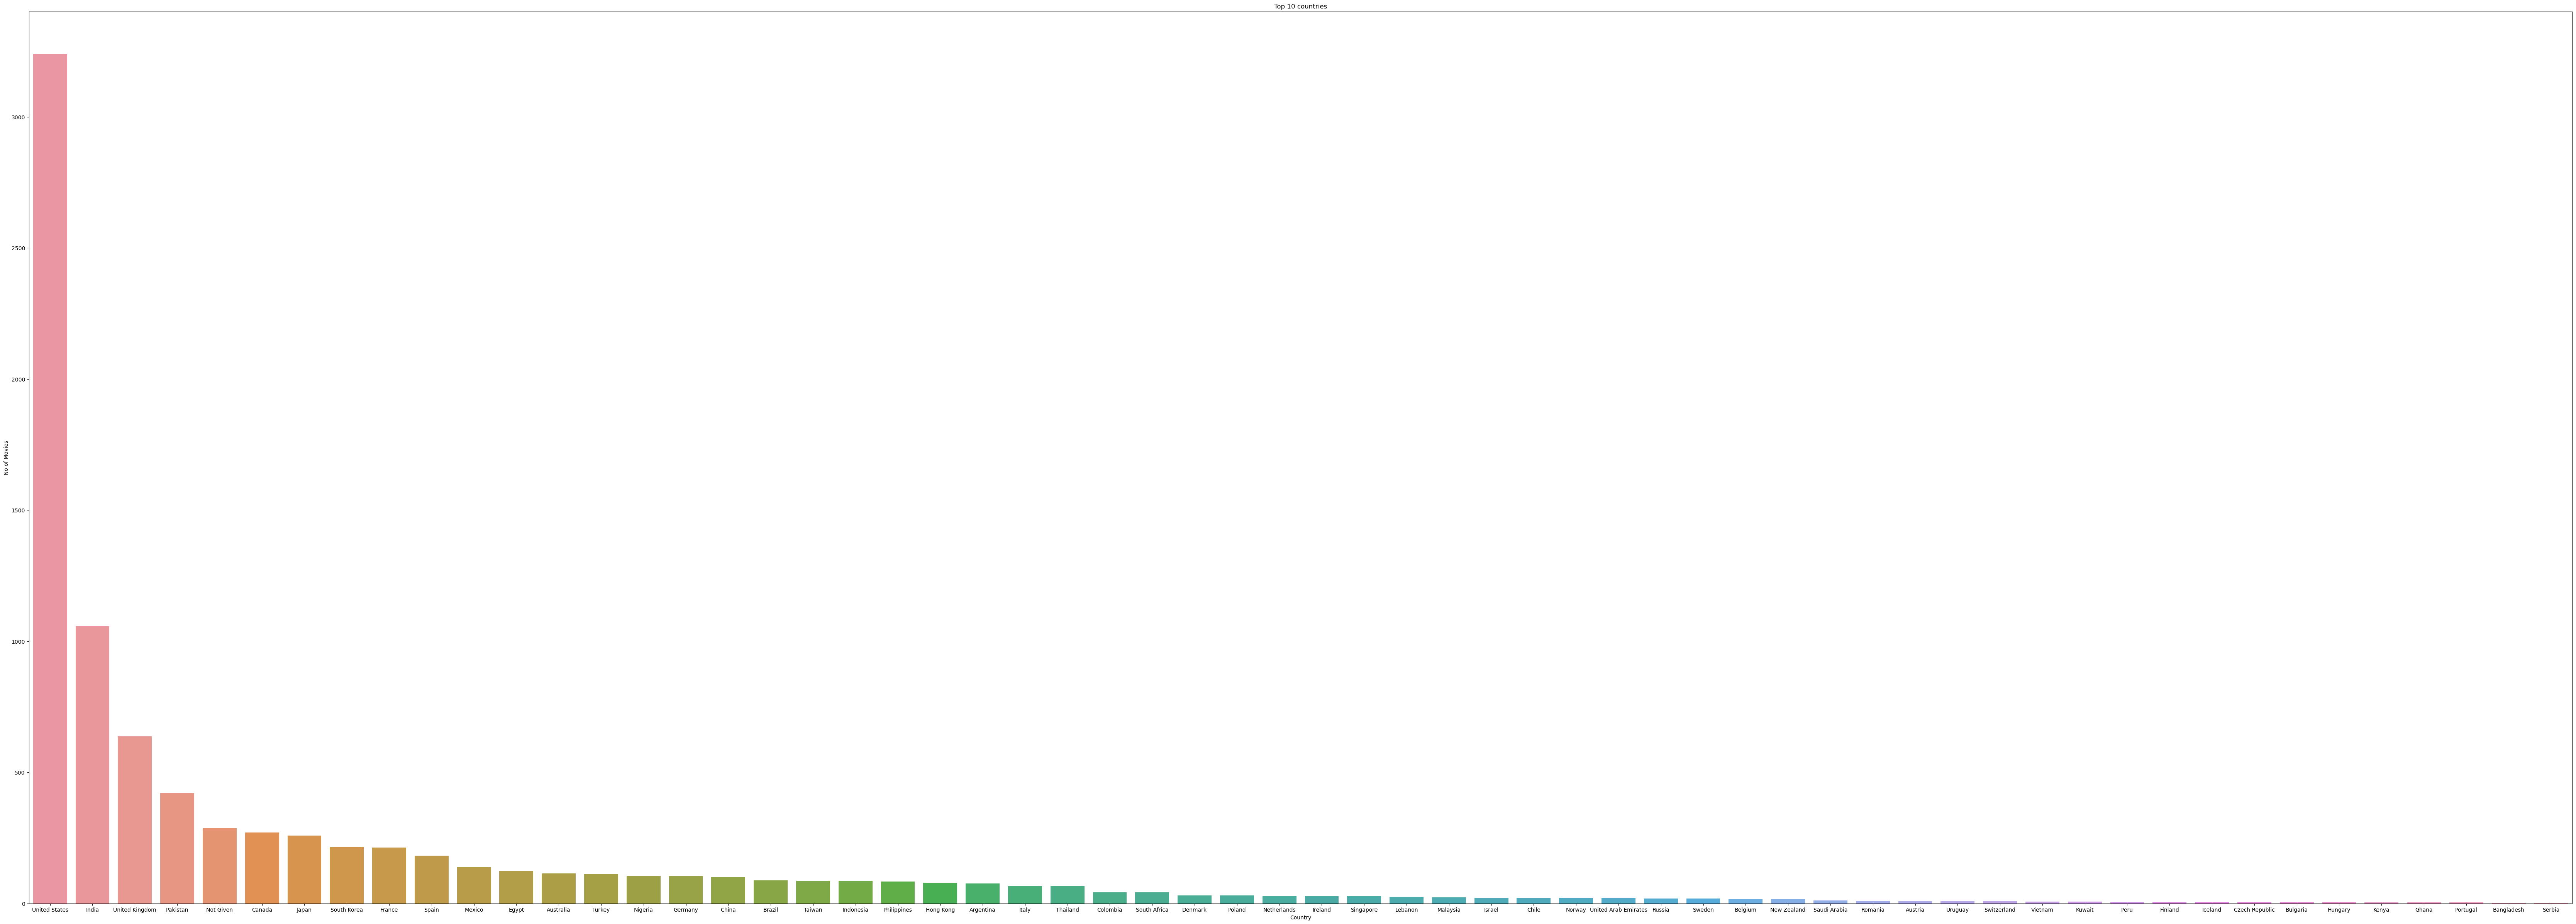

In [45]:
plt.figure(figsize=(85,30))
plt.title('Top 10 countries')
sns.barplot(x='country',y='count',data=country)
plt.xlabel('Country')
plt.ylabel('No of Movies')

**This code generates a histogram using Pandas to visualize the distribution of release years in the DataFrame `df`. The histogram is plotted with 30 bins and labeled axes.**

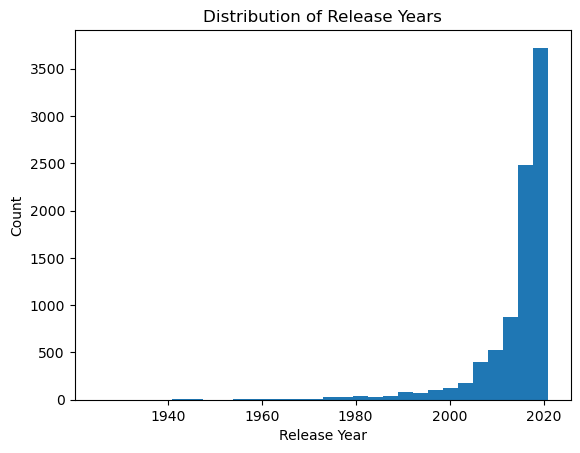

In [22]:
df['release_year'].plot(kind='hist', bins=30)

plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**This code groups the DataFrame `df` by 'rating' and 'type', counts the occurrences of each rating in each category, and returns the result as a DataFrame called `ratings`.**

In [23]:
ratings = df.groupby(['rating', 'type'])['type'].value_counts().reset_index()
ratings

,rating,type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


**This code selects the top 10 movie ratings from the DataFrame `ratings`, filtering for rows where the 'type' column is equal to 'Movie' and sorting by count in descending order.**

In [24]:
top_10_movie_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_ratings

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


**This code creates a bar plot to visualize the top 10 movie ratings using Pandas.**

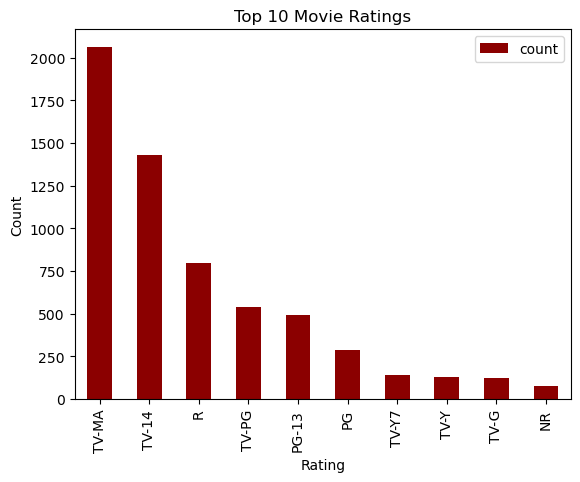

In [25]:
top_10_movie_ratings.plot(x='rating', y='count', kind='bar', color='darkred')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This code selects the top 10 TV show ratings from the DataFrame `ratings`, filtering for rows where the 'type' column is equal to 'TV Show' and sorting by count in descending order.**

In [26]:
top_10_TV_Show_ratings = ratings[ratings['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_ratings

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


**This code creates a bar plot to visualize the top 10 TV show ratings using Pandas.**

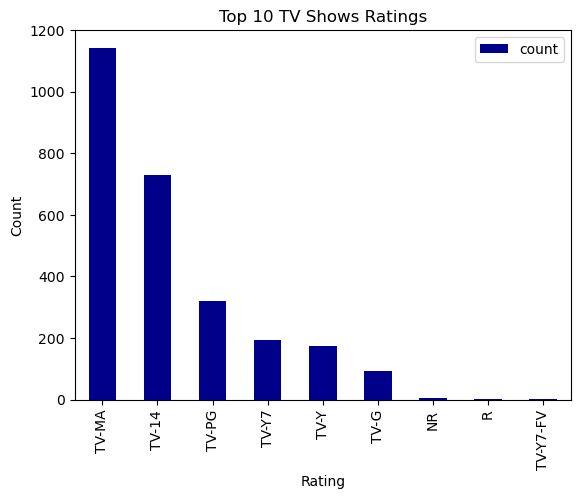

In [27]:
top_10_TV_Show_ratings.plot(x='rating', y='count', kind='bar', color='darkblue')
plt.title('Top 10 TV Shows Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This code counts the occurrences of each duration in each category ('Movie' or 'TV Show') and stores the result in the DataFrame `durations`.**

In [28]:
durations = df.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


**This code selects the top 10 movie durations from the DataFrame `durations`, filtering for rows where the 'type' column is equal to 'Movie' and sorting by count in descending order.**

In [29]:
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


**This code creates a bar plot to visualize the top 10 movie durations using Pandas.**

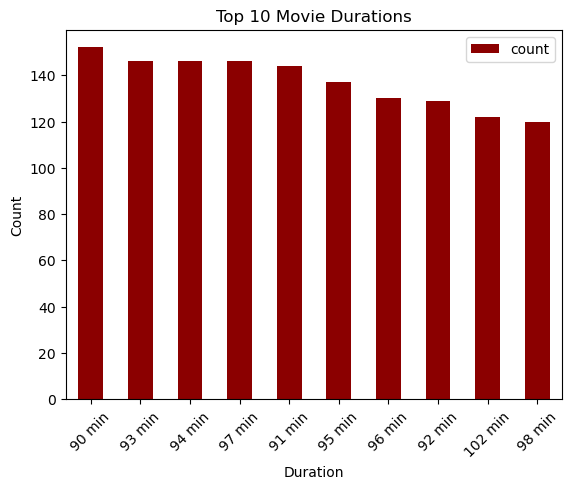

In [30]:
top_10_movie_durations.plot(x='duration', y='count', kind='bar', color='darkred')
plt.title('Top 10 Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This code selects the top 10 TV show durations from the DataFrame `durations`, filtering for rows where the 'type' column is equal to 'TV Show' and sorting by count in descending order.**

In [31]:
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1791
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


**This code creates a bar plot to visualize the top 10 TV show durations using Pandas.**

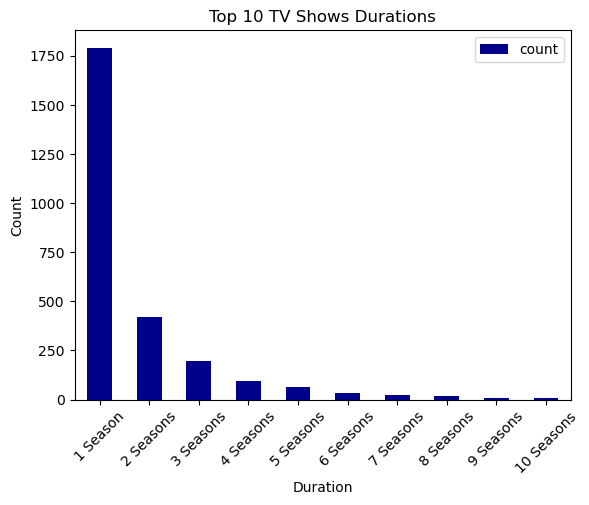

In [32]:
top_10_TV_Show_durations.plot(x='duration', y='count', kind='bar', color='darkblue')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**This code counts the occurrences of each genre in each category ('Movie' or 'TV Show') and stores the result in the DataFrame `genre`.**

In [33]:
genre = df.groupby(['genre', 'type'])['genre'].value_counts().reset_index()
genre

,genre,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


**This code selects the top 10 genres for movies from the DataFrame `genre`, filtering for rows where the 'type' column is equal to 'Movie' and sorting by count in descending order.**

In [34]:
top_10_listed_in_movie = genre[genre['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_listed_in_movie

,genre,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


**This code creates a bar plot to visualize the top 10 listed genres for movies using Pandas.**

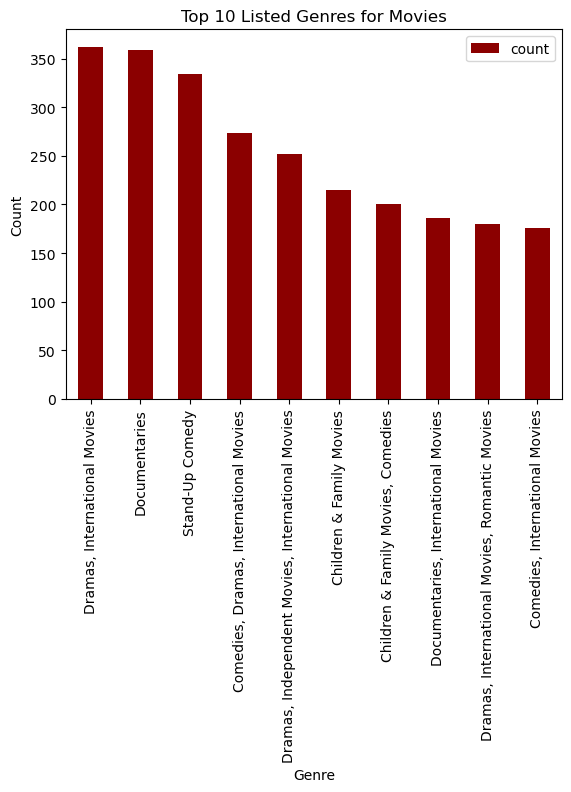

In [35]:
top_10_listed_in_movie.plot(x='genre', y='count', kind='bar', color='darkred')
plt.title('Top 10 Listed Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This code selects the top 10 genres for TV shows from the DataFrame `genre`, filtering for rows where the 'type' column is equal to 'TV Show' and sorting by count in descending order.**

In [36]:
top_10_listed_in_TV_Show = genre[genre['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_listed_in_TV_Show

,genre,type,count
421,Kids' TV,TV Show,219
411,"International TV Shows, TV Dramas",TV Show,121
243,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110
432,"Kids' TV, TV Comedies",TV Show,97
445,Reality TV,TV Show,95
392,"International TV Shows, Romantic TV Shows, TV ...",TV Show,94
393,"International TV Shows, Romantic TV Shows, TV ...",TV Show,90
80,"Anime Series, International TV Shows",TV Show,87
290,Docuseries,TV Show,84
486,TV Comedies,TV Show,68


**This code creates a bar plot to visualize the top 10 listed genres for TV shows using Pandas.**

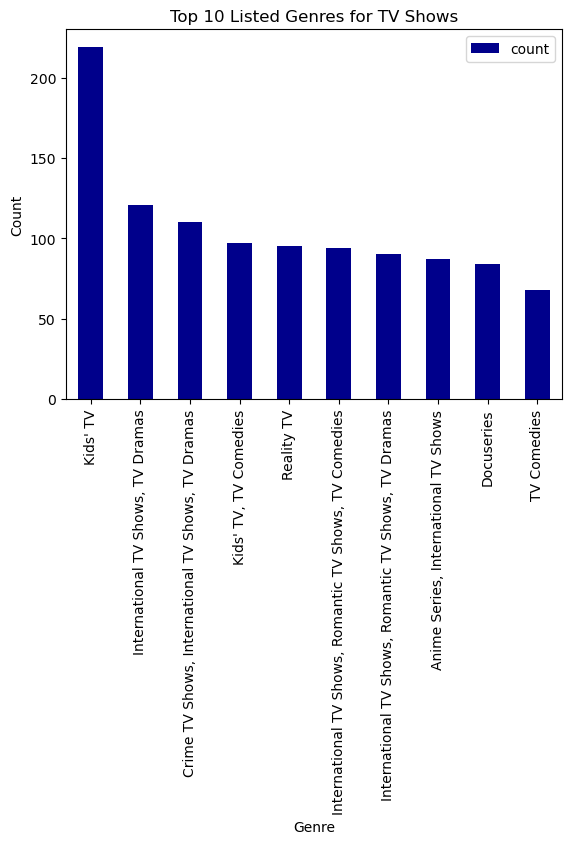

In [37]:
top_10_listed_in_TV_Show.plot(x='genre', y='count', kind='bar', color='darkblue')
plt.title('Top 10 Listed Genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**This code generates a scatter plot to explore the relationship between the duration and release year of content, with points colored by content type.**

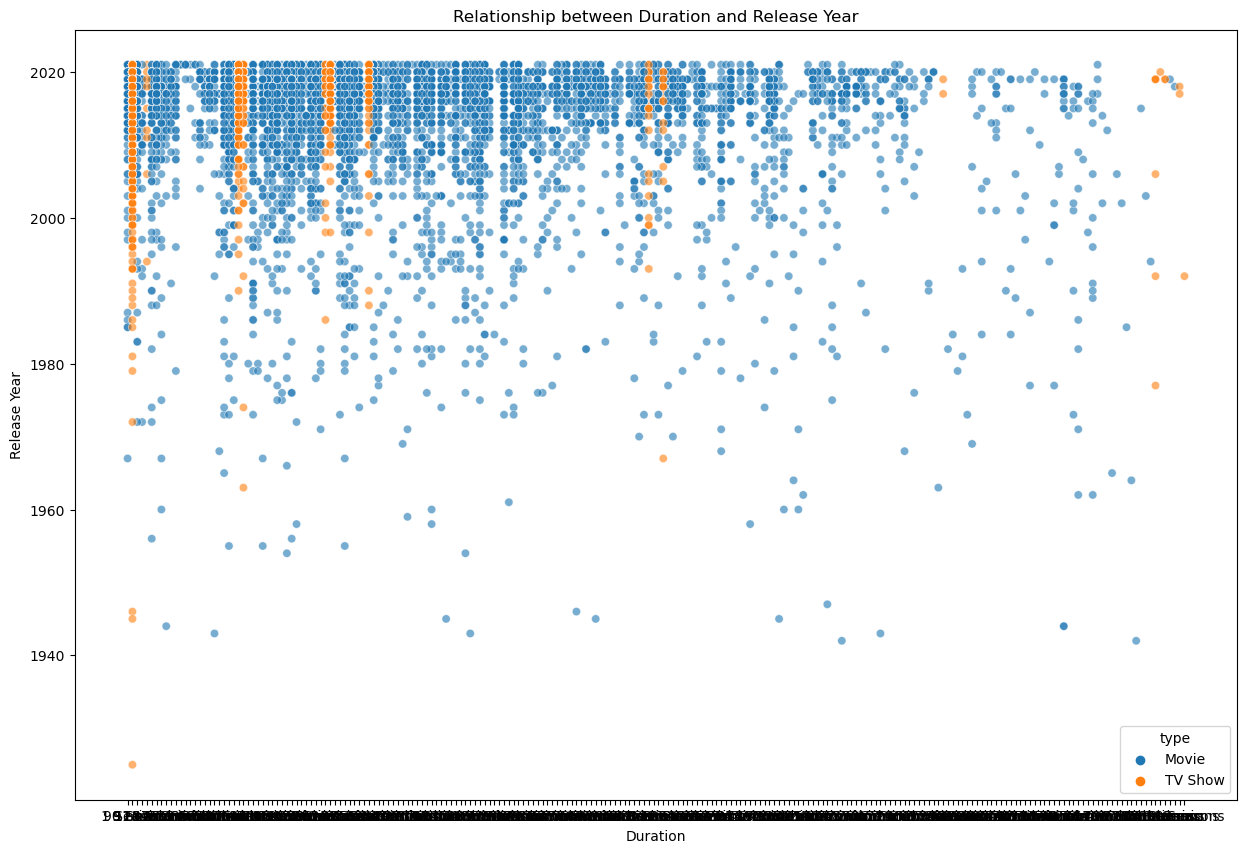

In [50]:
# Exploring relationships between features
# Scatter plot between 'duration' and 'release_year'

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='duration', y='release_year', hue='type', alpha=0.6)
plt.title('Relationship between Duration and Release Year')
plt.xlabel('Duration')
plt.ylabel('Release Year')
plt.show()

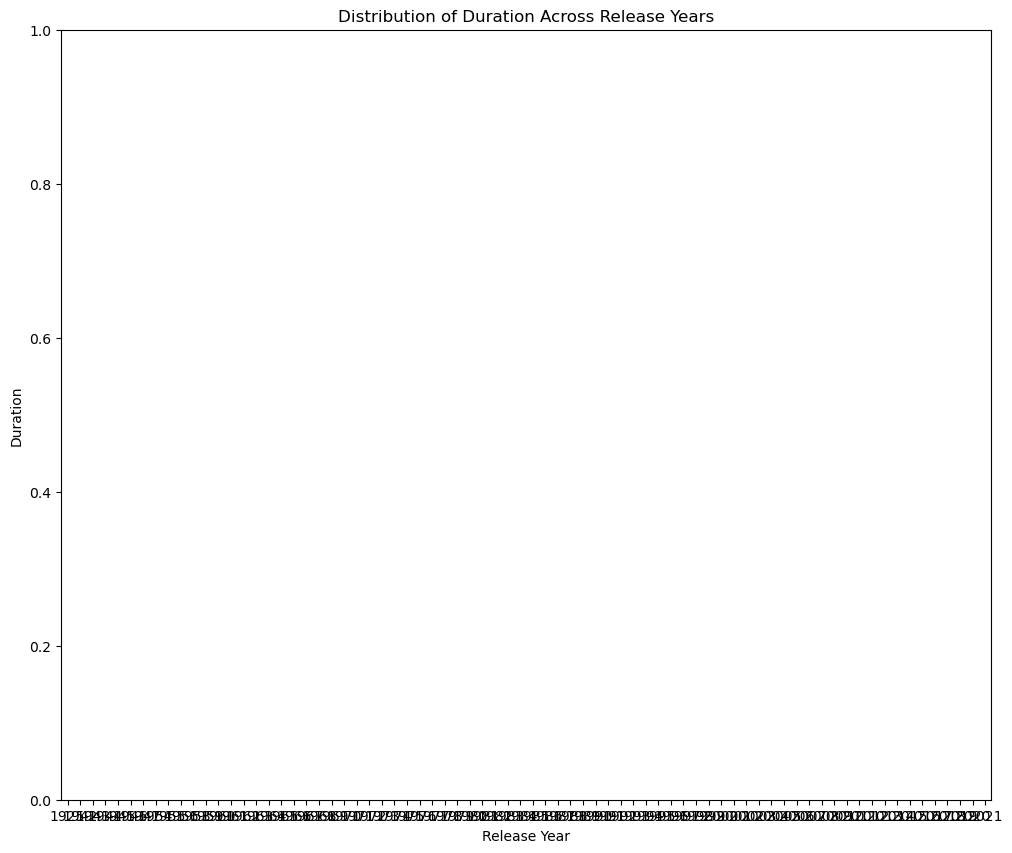



---


#**4. Model Building:**



###1. **Linear Classifier:**
   - The Linear Classifier is a simple model that aims to separate classes using a linear boundary.
   - It works by assigning weights to each feature and combining them linearly to make predictions.
   - Mathematically, the prediction is calculated as the dot product of the feature vector and the weight vector, plus a bias term. This results in a linear decision boundary.
   - If the resulting value is above a certain threshold, it predicts one class; otherwise, it predicts the other class.
   - Training typically involves adjusting the weights and bias to minimize a loss function, such as the hinge loss or squared loss.

###2. **Logistic Regression Classifier:**
   - Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm.
   - It's based on the logistic function (also called sigmoid function), which maps any real-valued number to a value between 0 and 1.
   - Logistic Regression models the probability that a given input belongs to a particular class.
   - It calculates a weighted sum of the input features, similar to linear regression, but then applies the logistic function to the result.
   - The output of logistic regression can be interpreted as the probability of the input belonging to the positive class.
   - During training, the model's parameters (weights) are optimized to maximize the likelihood of the observed data, typically using techniques like gradient descent and maximum likelihood estimation.

In summary, both models are used for binary classification tasks where the goal is to predict whether an input belongs to one of two classes. The Linear Classifier uses a linear boundary, while Logistic Regression models the probability of the input belonging to a class using the logistic function.

##**With sklearn Library:**

##**Linear Classifier:**

This code performs the following steps:

1. **Suppresses Convergence Warning**: It suppresses the convergence warning generated by scikit-learn's `LinearSVC`.

2. **Defines Features and Target Variable**: It defines features (`X`) and the target variable (`y`) from the Netflix dataset.

3. **Splits Data**: It splits the dataset into training and testing sets using `train_test_split()`.

4. **Initializes and Trains Linear SVC Model**: It initializes a linear Support Vector Classifier (`LinearSVC`) model with a high `max_iter` value and fits the model to the training data.

5. **Predicts Labels**: It predicts the target labels for the test set using the trained model.

6. **Calculates Accuracy**: It calculates the accuracy of the model on the test set using `accuracy_score()`.

7. **Plots Confusion Matrix**: It plots a confusion matrix heatmap to visualize the model's performance.

This code provides a concise workflow for training a linear SVM model, evaluating its accuracy, and visualizing its performance through a confusion matrix.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppressing convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming df is your DataFrame containing the Netflix data

# Define the features (X) and target variable (y)
X = df[['release_year', 'duration']]  # Example features, you can choose other columns as well
y = df['type']  # Target variable (Movie or TV Show)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear SVC model with a higher max_iter value
model = LinearSVC(max_iter=200000)  # Increase max_iter further

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ValueError: could not convert string to float: '108 min'

##**Logistic Regression:**

This code does the following:

1. **Imports Libraries**: It imports necessary libraries for machine learning tasks and data visualization.

2. **Defines Features and Target Variable**: It defines features (`X`) and the target variable (`y`) from the Netflix dataset.

3. **Splits Data**: It splits the dataset into training and testing sets using `train_test_split()`.

4. **Initializes and Trains Logistic Regression Model**: It initializes a logistic regression model with a maximum iteration parameter and fits the model to the training data.

5. **Predicts Labels**: It predicts the target labels for the test set using the trained model.

6. **Calculates Accuracy**: It calculates the accuracy of the model on the test set using `accuracy_score()`.

7. **Plots Confusion Matrix**: It plots a confusion matrix heatmap to visualize the model's performance.

This code efficiently performs logistic regression classification on the Netflix dataset, evaluates its accuracy, and visualizes its performance through a confusion matrix.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the Netflix data

# Define the features (X) and target variable (y)
X = df[['release_year', 'duration']]  # Example features, you can choose other columns as well
y = df['type']  # Target variable (Movie or TV Show)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter further if needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ValueError: could not convert string to float: '108 min'

##**Without sklearn Library:**

##**Linear Classifier:**

This code builds a linear classifier from scratch and evaluates its performance:

1. **LinearClassifier Class**: Implements the linear classifier with methods for fitting and predicting.

2. **Initialization**: Sets hyperparameters like learning rate and maximum iterations.

3. **Fit Method**: Trains the model using gradient descent, updating weights based on predicted and actual labels.

4. **Predict Method**: Assigns binary labels based on computed scores.

5. **Training and Testing**: Loads data, splits it, and initializes the classifier.

6. **Model Evaluation**: Predicts labels for the test set and calculates accuracy and confusion matrix.

7. **Visualization**: Displays the confusion matrix using seaborn's heatmap.

In [ ]:
import numpy as np

class LinearClassifier:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        self.X_train = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.y_train = np.array(y, dtype=float)  # Convert y_train to numpy array
        self.weights = np.zeros(self.X_train.shape[1])  # Initialize weights
        for _ in range(self.max_iter):
            scores = np.dot(self.X_train, self.weights)
            predictions = np.where(scores > 0, 1, 0)
            gradient = np.dot(self.X_train.T, (self.y_train - predictions)) / len(self.y_train)
            self.weights += self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        scores = np.dot(X, self.weights)
        return np.where(scores > 0, 1, 0)

# Assuming df is your DataFrame containing the Netflix data
# Define features (X) and target variable (y)
X = df[['release_year', 'duration']].values  # Example features, you can choose other columns as well
y = (df['type'] == 'TV Show').astype(int).values  # Convert 'type' to binary labels (1 for TV Show, 0 for Movie)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear classifier from scratch
model = LinearClassifier(learning_rate=0.01, max_iter=200)  # You can adjust hyperparameters as needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

##**Logistic Regression:**

This code performs logistic regression from scratch to classify Netflix entries as "Movie" or "TV Show" based on features like release year and duration. Here's a shorter explanation:

1. **Logistic Regression Class**: Defines a logistic regression model with methods for fitting and predicting.
2. **Train-Test Split Function**: Splits the data into training and testing sets.
3. **Accuracy Score Function**: Calculates the accuracy of the model predictions.
4. **Confusion Matrix Function**: Computes the confusion matrix to evaluate the model's performance.
5. **Data Preparation**: Defines features (X) and target variable (y), encoding categorical labels.
6. **Model Training**: Initializes and fits the logistic regression model to the training data.
7. **Prediction**: Predicts the target labels for the test set.
8. **Accuracy Calculation**: Computes the accuracy of the model predictions.
9. **Confusion Matrix Calculation**: Calculates the confusion matrix.
10. **Confusion Matrix Plotting**: Visualizes the confusion matrix to assess the model's performance.

Overall, this code trains a logistic regression model, makes predictions, evaluates accuracy, and displays the confusion matrix.

Accuracy: 0.997155858930603


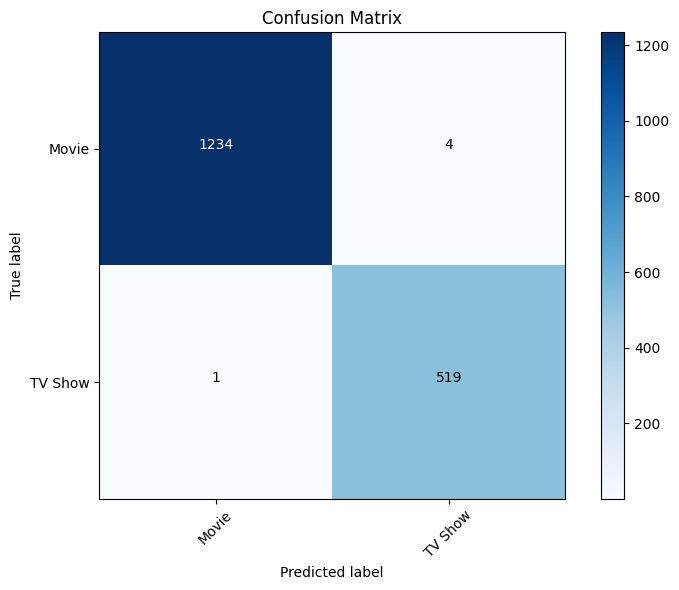

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, max_iter=200):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip values to avoid overflow

    def fit(self, X, y):
        self.X_train = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.y_train = np.array(y, dtype=float)  # Convert y_train to numpy array
        self.weights = np.zeros(self.X_train.shape[1])  # Initialize weights
        for _ in range(self.max_iter):
            z = np.dot(self.X_train, self.weights)
            h = self.sigmoid(z)
            gradient = np.dot(self.X_train.T, (h - self.y_train)) / len(self.y_train)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        return np.round(self.sigmoid(np.dot(X, self.weights)))

def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    num_classes = len(classes)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(num_classes):
        for j in range(num_classes):
            conf_matrix[i, j] = np.sum((y_true == classes[i]) & (y_pred == classes[j]))
    return conf_matrix

# Assuming df is your DataFrame containing the Netflix data
# Define features (X) and target variable (y)
X = df[['release_year', 'duration']].values  # Example features, you can choose other columns as well
y = df['type'].map({'Movie': 0, 'TV Show': 1}).values  # Encode categorical labels to numeric values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model from scratch
model = LogisticRegressionScratch(learning_rate=0.01, max_iter=200)  # Increase max_iter further if needed

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Use np.unique(y) instead of classes
plt.xticks(tick_marks, ['Movie', 'TV Show'], rotation=45)  # Manually set the class names
plt.yticks(tick_marks, ['Movie', 'TV Show'])  # Manually set the class names
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()




---


#**5. Model Training and Evaluation:**



###Training:
In the provided code, the training of both models is already completed using the `fit()` method with the training data. Therefore, we can say that the training has been done.

###Evaluation:

The **F1 score** is a measure that balances both precision and recall, giving a single metric for model performance in classification tasks.

Linear SVM Model:
Accuracy: 0.9965870307167235
Precision: 0.9942307692307693
Recall: 0.9942307692307693
F1 Score: 0.9942307692307693

Logistic Regression Model:
Accuracy: 0.9965870307167235
Precision: 0.9904580152671756
Recall: 0.9980769230769231
F1 Score: 0.9942528735632185


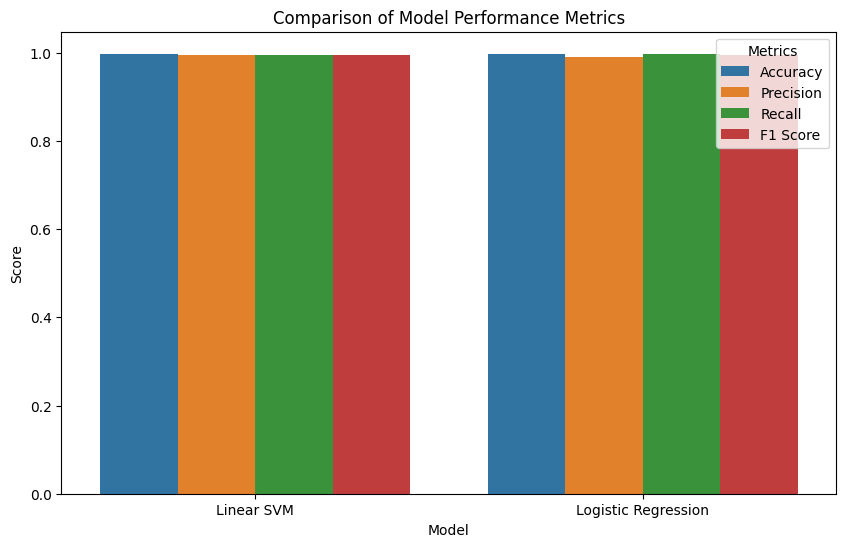


Cross-Validation Scores (Accuracy) - Linear SVM: [0.9960182  0.99715586 0.99943117 0.99886234 0.99829352]
Mean CV Accuracy - Linear SVM: 0.9979522184300341

Cross-Validation Scores (Accuracy) - Logistic Regression: [0.99658703 0.99658703 0.99943117 0.99715586 0.99943117]
Mean CV Accuracy - Logistic Regression: 0.9978384527872581


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppressing convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming df is your DataFrame containing the Netflix data

# Define features (X) and target variable (y)
X = df[['release_year', 'duration']].values  # Example features, you can choose other columns as well
y = (df['type'] == 'TV Show').astype(int).values  # Convert 'type' to binary labels (1 for TV Show, 0 for Movie)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear SVM model
model_svm = LinearSVC(max_iter=200000)  # Increase max_iter further if needed
model_svm.fit(X_train, y_train)

# Initialize and train the Logistic Regression model
model_lr = LogisticRegression(max_iter=200)  # Increase max_iter further if needed
model_lr.fit(X_train, y_train)

# Make predictions for both models
y_pred_svm = model_svm.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

# Evaluate Linear SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print evaluation metrics for both models
print("Linear SVM Model:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

# Compare the performance of the two models visually
metrics_df = pd.DataFrame({
    'Model': ['Linear SVM', 'Logistic Regression'],
    'Accuracy': [accuracy_svm, accuracy_lr],
    'Precision': [precision_svm, precision_lr],
    'Recall': [recall_svm, recall_lr],
    'F1 Score': [f1_svm, f1_lr]
})

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics')
plt.show()

# Cross-validation
svm_cv_scores = cross_val_score(model_svm, X, y, cv=5)
lr_cv_scores = cross_val_score(model_lr, X, y, cv=5)

print("\nCross-Validation Scores (Accuracy) - Linear SVM:", svm_cv_scores)
print("Mean CV Accuracy - Linear SVM:", svm_cv_scores.mean())
print("\nCross-Validation Scores (Accuracy) - Logistic Regression:", lr_cv_scores)
print("Mean CV Accuracy - Logistic Regression:", lr_cv_scores.mean())


###Comparison:

Here are the numeric values for each performance metric:

**Linear SVM Model:**
- Accuracy: 0.9965870307167235
- Precision: 0.9942307692307693
- Recall: 0.9942307692307693
- F1 Score: 0.9942307692307693

Precision, recall, and F1-score are all approximately 0.994, indicating high performance in correctly identifying TV shows.
These scores suggest that the model maintains a good balance between precision and recall, indicating robust performance across different evaluation metrics.

**Logistic Regression Model:**
- Accuracy: 0.9965870307167235
- Precision: 0.9904580152671756
- Recall: 0.9980769230769231
- F1 Score: 0.9942528735632185

While precision is slightly lower at approximately 0.990, recall is higher at approximately 0.998. The F1-score, which considers both precision and recall, is also slightly higher at approximately 0.9943 compared to the Linear SVM model.



**Overall, both models perform exceptionally well, but the Logistic Regression model shows a slightly better recall rate, suggesting it may be slightly better at correctly identifying TV shows while maintaining a high level of precision.**

---



#**6. Recommendation:**


To enhance the models:

1. Hyperparameter Optimization: Tune parameters for each model for better performance.

2. Ensemble Techniques: Combine predictions from multiple models for improved accuracy.

3. Interpretability: Analyze feature importance for insights into model decisions.

4. Data Expansion: Collect more data to improve model generalization.

By applying these steps iteratively, you can refine the models for better accuracy and effectiveness.


---

